In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

<span style="font-size: 200%;">Loading the dataset
</span>

In [2]:
paths = []
labels = []
for dirname,_,filenames in os.walk(r"D:\CS Projects\Machine learning\Voice_sentiment\dataset\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label = filename.split("_")[-1]
        label = label.split(".")[0]
        labels.append(label.lower())
        
print("Dataset Loaded")
                 


Dataset Loaded


In [3]:
paths[:5]


['D:\\CS Projects\\Machine learning\\Voice_sentiment\\dataset\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\CS Projects\\Machine learning\\Voice_sentiment\\dataset\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\CS Projects\\Machine learning\\Voice_sentiment\\dataset\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\CS Projects\\Machine learning\\Voice_sentiment\\dataset\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\CS Projects\\Machine learning\\Voice_sentiment\\dataset\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [4]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [5]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,D:\CS Projects\Machine learning\Voice_sentimen...,angry
1,D:\CS Projects\Machine learning\Voice_sentimen...,angry
2,D:\CS Projects\Machine learning\Voice_sentimen...,angry
3,D:\CS Projects\Machine learning\Voice_sentimen...,angry
4,D:\CS Projects\Machine learning\Voice_sentimen...,angry


In [6]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

<span style="font-size: 200%;">
Exploratory Data Analysis
</span>

In [7]:
df.head()

,speech,label
0,D:\CS Projects\Machine learning\Voice_sentimen...,angry
1,D:\CS Projects\Machine learning\Voice_sentimen...,angry
2,D:\CS Projects\Machine learning\Voice_sentimen...,angry
3,D:\CS Projects\Machine learning\Voice_sentimen...,angry
4,D:\CS Projects\Machine learning\Voice_sentimen...,angry


<Axes: xlabel='label', ylabel='count'>

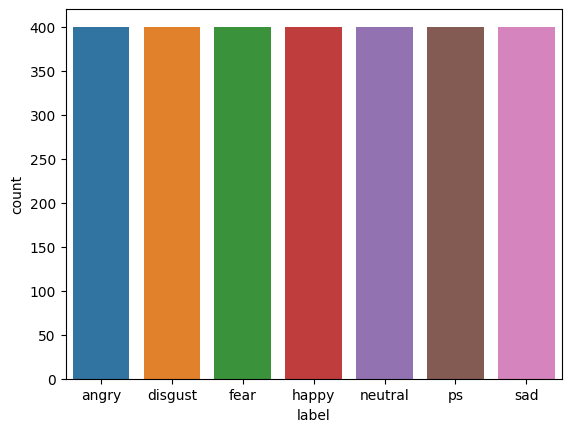

In [8]:
sns.countplot(x='label',data=df)

In [9]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x= librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10.5,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    




In [10]:
emotion = 'fear'
filtered_df = df[df['label'] == emotion]
path = filtered_df['speech'].iloc[0] if not filtered_df.empty else None
path


'D:\\CS Projects\\Machine learning\\Voice_sentiment\\dataset\\TESS Toronto emotional speech set data\\OAF_Fear\\OAF_back_fear.wav'

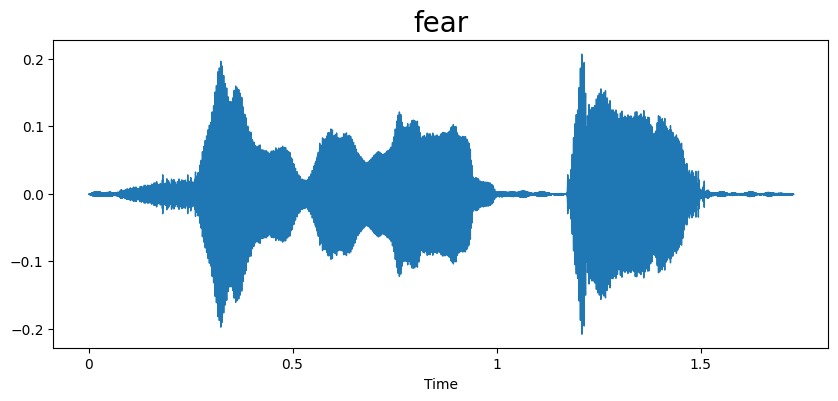

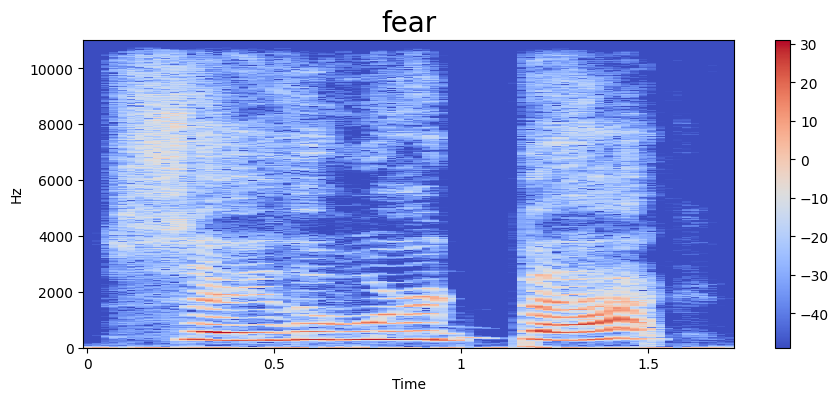

In [11]:
data, sampling_rate= librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

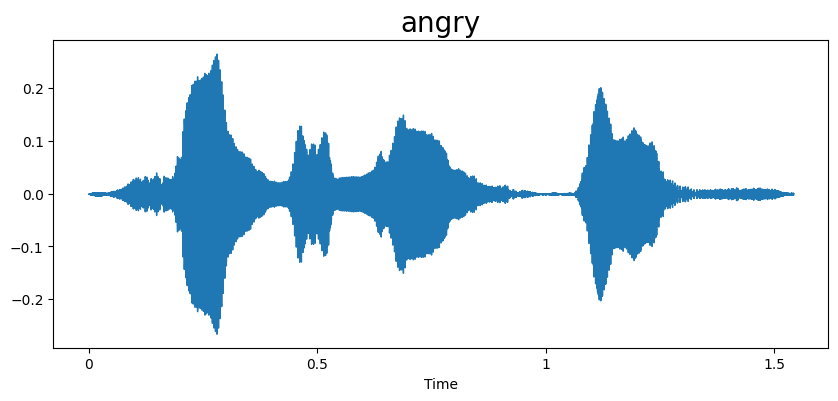

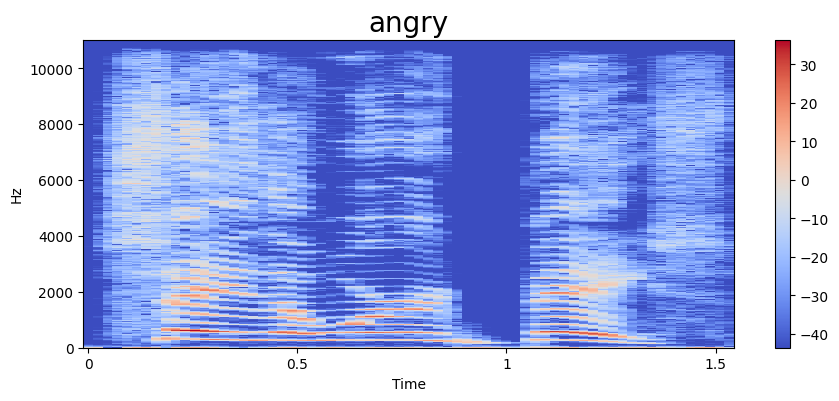

In [12]:
emotion = 'angry'
filtered_df = df[df['label'] == emotion]
path = filtered_df['speech'].iloc[2] if not filtered_df.empty else None
path

data, sampling_rate= librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

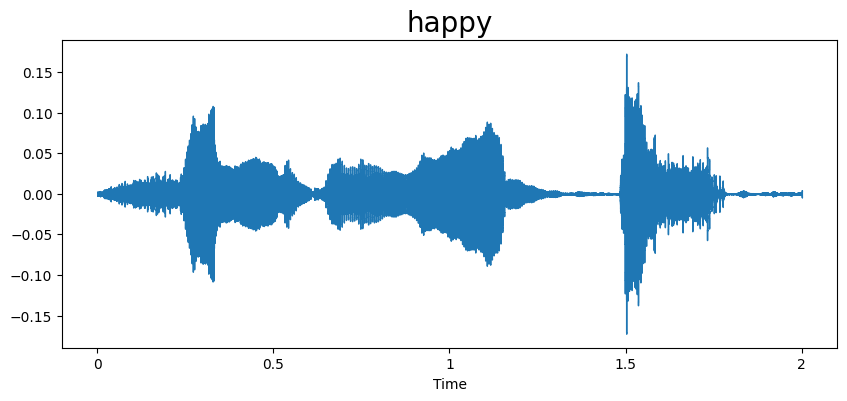

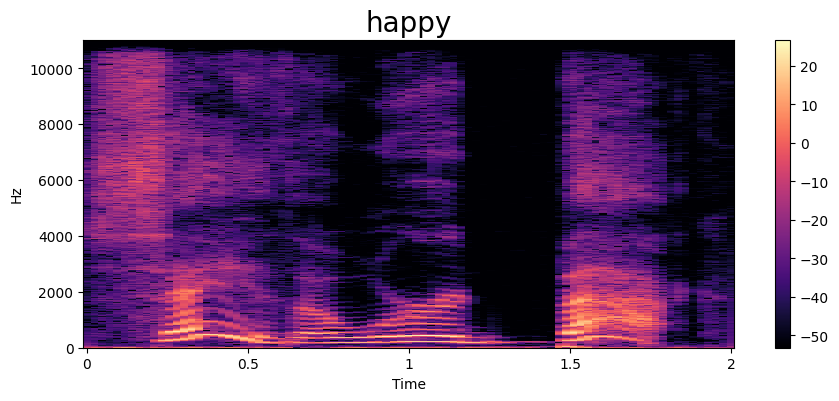

In [13]:
emotion = 'happy'
filtered_df = df[df['label'] == emotion]
path = filtered_df['speech'].iloc[0] if not filtered_df.empty else None
path

data, sampling_rate= librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

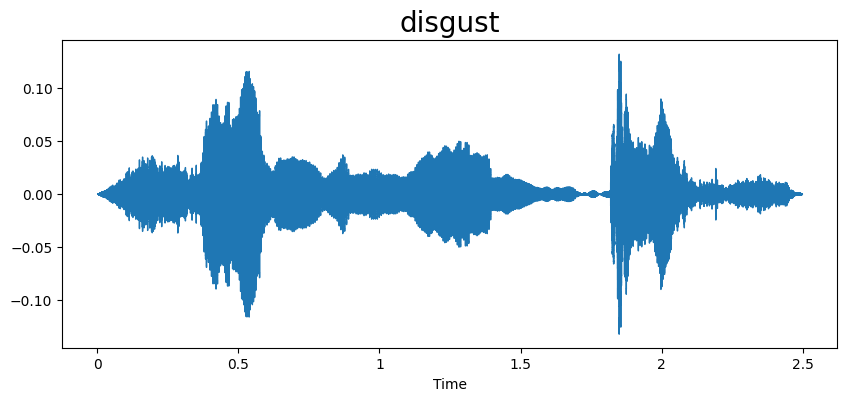

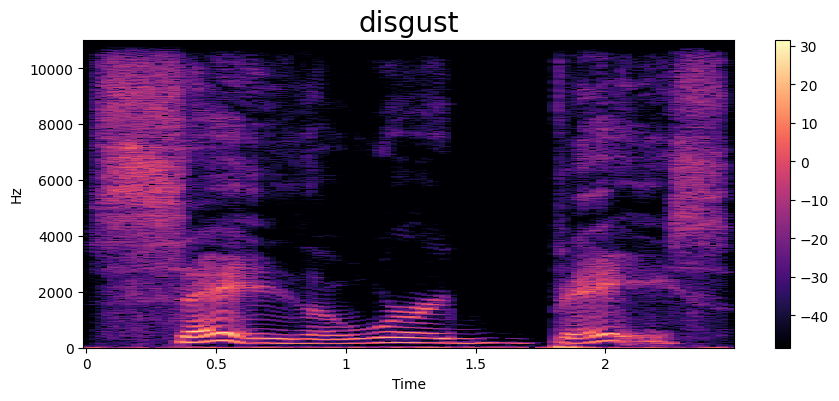

In [14]:
emotion = 'disgust'
filtered_df = df[df['label'] == emotion]
path = filtered_df['speech'].iloc[2] if not filtered_df.empty else None
path

data, sampling_rate= librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

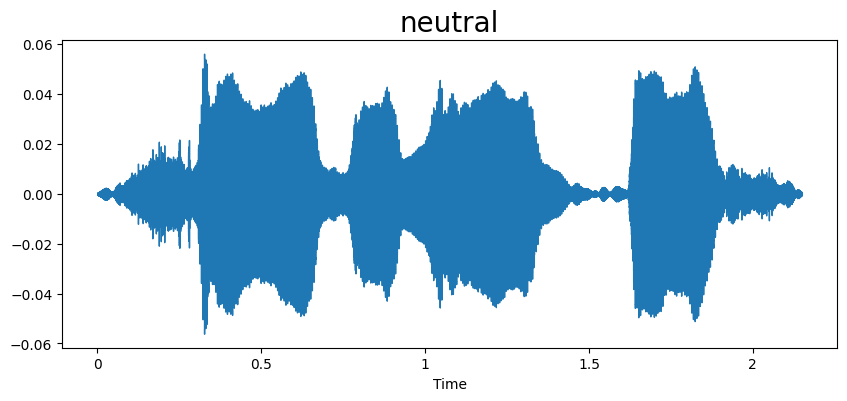

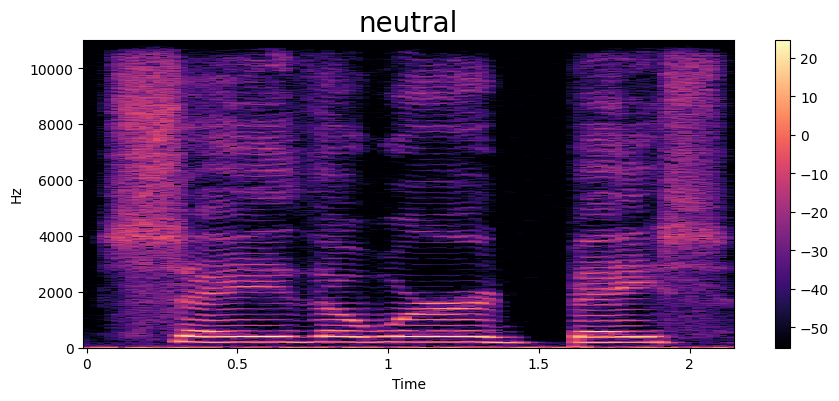

In [15]:
emotion = 'neutral'
filtered_df = df[df['label'] == emotion]
path = filtered_df['speech'].iloc[2] if not filtered_df.empty else None
path

data, sampling_rate= librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

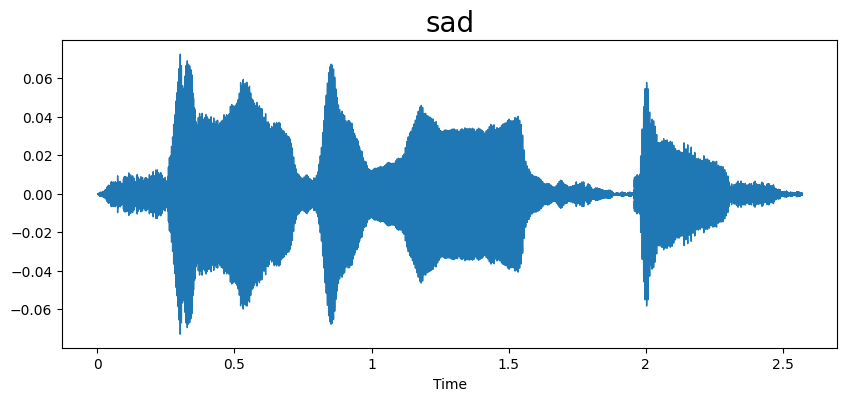

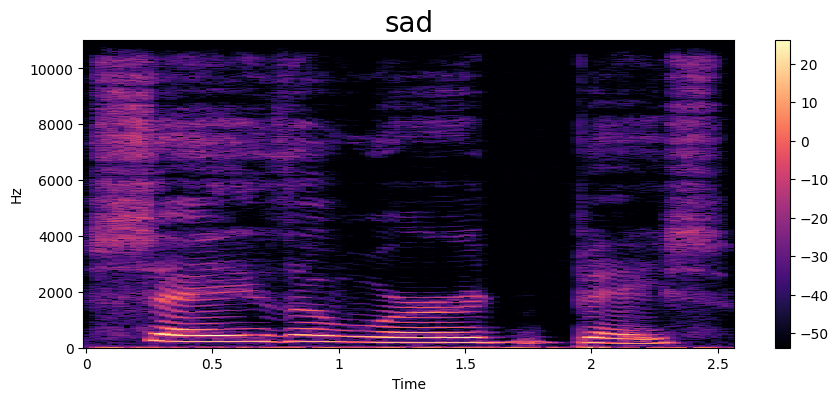

In [16]:
emotion = 'sad'
filtered_df = df[df['label'] == emotion]
path = filtered_df['speech'].iloc[2] if not filtered_df.empty else None
path

data, sampling_rate= librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

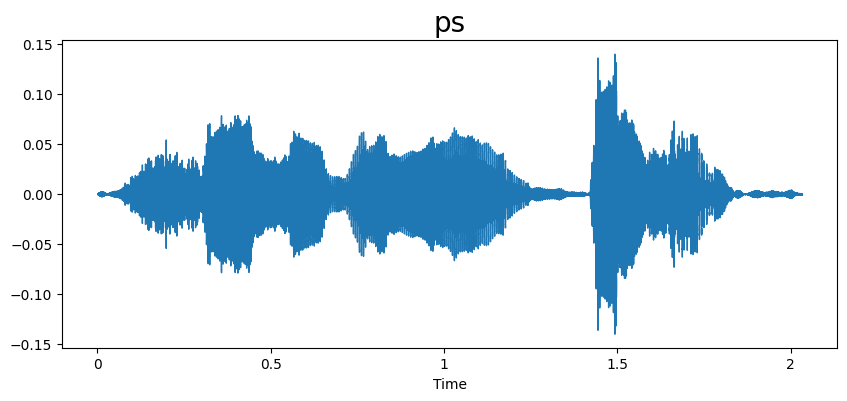

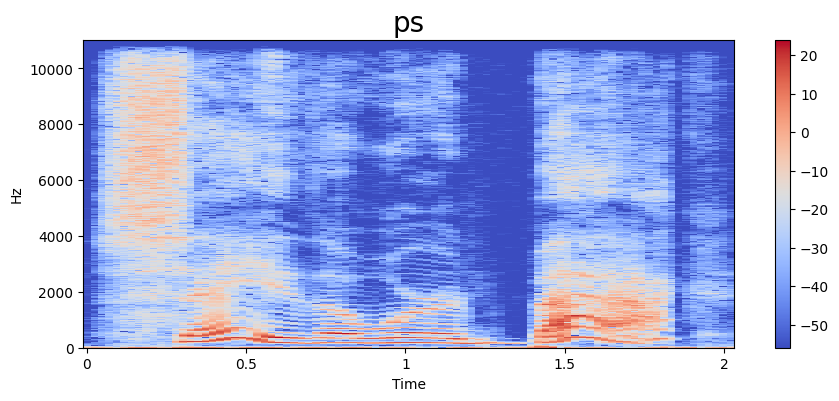

In [17]:
emotion = 'ps'
filtered_df = df[df['label'] == emotion]
path = filtered_df['speech'].iloc[0] if not filtered_df.empty else None
path

data, sampling_rate= librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

<span style="font-size: 200%;">
Feature Extraction
</span>

In [52]:
def extract_mfcc(x):
    if isinstance(x, str):
        # If x is a string, assume it's a file path and load the audio file
        y, sr = librosa.load(x, duration=3, offset=0.5)
    else:
        # If x is an array or audio data, directly use it for MFCC extraction
        y, sr = x, 24414 # Actual sampling rate of your audio data
    
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

X_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))


In [19]:
extract_mfcc(df['speech'][0])


array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [57]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709506, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54757, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [65]:
X = [extract_mfcc(x) for x in X_mfcc]
X = np.array(X)
X = np.expand_dims(X, axis=-1)
X.shape


(2800, 40, 1)

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])

In [60]:
y = y.toarray()
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [61]:
y.shape

(2800, 7)

<span style="font-size: 200%;">
LSTM Model
</span>

In [69]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 7)                

In [81]:
history = model.fit(X,y,validation_split=0.2,epochs=50,batch_size=64)

Epoch 1/50
35/35 [==============================] - 2s 68ms/step - loss: 0.0428 - accuracy: 0.9884 - val_loss: 4.0048 - val_accuracy: 0.4518
Epoch 2/50
35/35 [==============================] - 2s 67ms/step - loss: 0.3430 - accuracy: 0.9321 - val_loss: 2.2134 - val_accuracy: 0.6518
Epoch 3/50
35/35 [==============================] - 2s 68ms/step - loss: 0.0667 - accuracy: 0.9772 - val_loss: 1.9507 - val_accuracy: 0.6500
Epoch 4/50
35/35 [==============================] - 2s 70ms/step - loss: 0.0620 - accuracy: 0.9821 - val_loss: 2.2828 - val_accuracy: 0.6214
Epoch 5/50
35/35 [==============================] - 2s 71ms/step - loss: 0.0474 - accuracy: 0.9884 - val_loss: 1.8651 - val_accuracy: 0.6500
Epoch 6/50
35/35 [==============================] - 2s 70ms/step - loss: 0.0440 - accuracy: 0.9879 - val_loss: 3.6464 - val_accuracy: 0.5268
Epoch 7/50
35/35 [==============================] - 3s 74ms/step - loss: 0.0467 - accuracy: 0.9866 - val_loss: 1.7649 - val_accuracy: 0.7482
Epoch 8/50
35

<span style="font-size: 200%;">
Making Predictions
</span>


In [84]:

from collections import Counter
counts = []
for i in range(0,800):
    sample_path = df['speech'][i]
    x_sample = extract_mfcc(sample_path)
    x_sample = np.array(x_sample)
    x_sample = np.expand_dims(x_sample, axis=-1)
    #x_sample = np.expand_dims(x_sample, axis=0)

    # Add batch dimension to the input data
    x_sample = np.expand_dims(x_sample, axis=0)

    x_sample.shape
    predictions = model.predict(x_sample, batch_size=512)

    # Use np.argmax directly on the single predictions array
    predicted_index = np.argmax(predictions)
    class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
    predicted_label = class_labels[predicted_index]

    counts.append(predicted_label)


1/1 [==============================] - 0s 19ms/step


In [85]:
count_dict = dict(Counter(counts))
print(count_dict)

{'disgust': 172, 'happy': 310, 'fear': 122, 'neutral': 115, 'sad': 1, 'angry': 73, 'ps': 7}


In [92]:
sample_path = r'D:\CS Projects\Machine learning\Voice_sentiment\dataset\samples\yelling_man.wav'
x_sample = extract_mfcc(sample_path)
x_sample = np.array(x_sample)
x_sample = np.expand_dims(x_sample,-1)
x_sample = np.expand_dims(x_sample,-0)

predictions = model.predict(x_sample, batch_size=64)

# Use np.argmax directly on the single predictions array
predicted_index = np.argmax(predictions)
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
predicted_label = class_labels[predicted_index]
print(predicted_label)

1/1 [==============================] - 0s 26ms/step
disgust


<span style="font-size: 200%;">
Plotting Accuracy Graph</span>

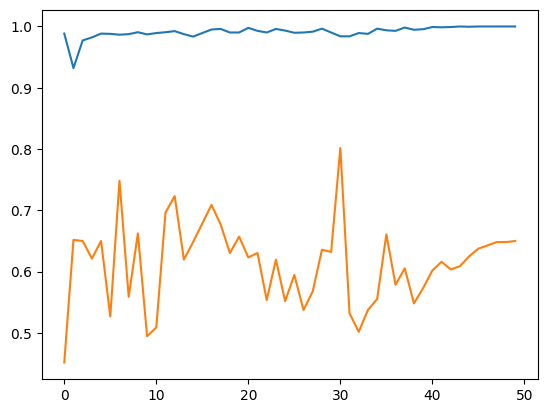

In [90]:
epochs = list(range(50))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label="Train accuracy")
plt.plot(epochs, val_accuracy, label="Validation accuracy")
plt.show()

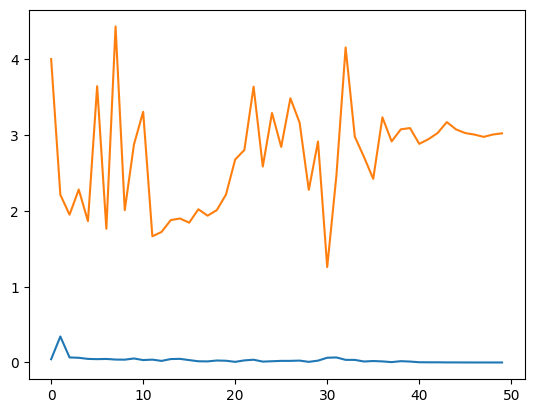

In [91]:
epochs = list(range(50))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label="Train accuracy")
plt.plot(epochs, val_loss, label="Validation accuracy")
plt.show()